In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
file_path = "../employee_attrition.csv"
df = pd.read_csv(file_path)

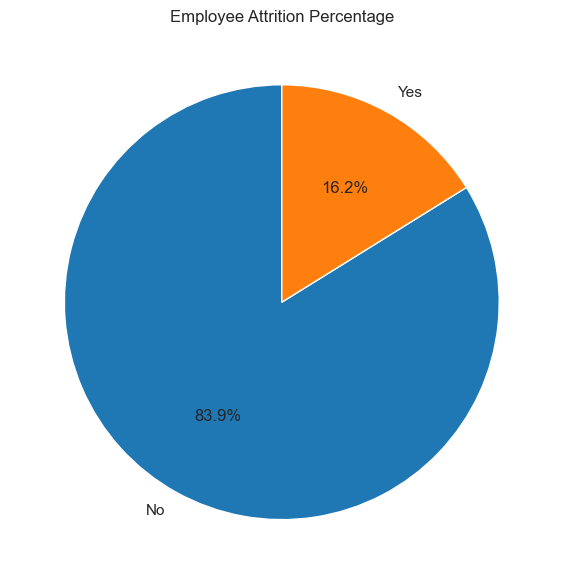

In [21]:
df.Attrition.value_counts().plot(kind="pie", autopct='%1.1f%%', colors=["#1f77b4", "#ff7f0e"], startangle=90)
plt.title("Employee Attrition Percentage")
plt.ylabel("")  # Hide the y-label for pie chart    
plt.tight_layout()
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

## Job Attrition Findigs:

### Out of total 10000 employees, 16.15%  have left the company due to various reasons, while 83.9% have stayed.
### Out of those 16.15% who have left , the majority(75%) have left with the reason of Job Satisfaction being very low ( 1/4).


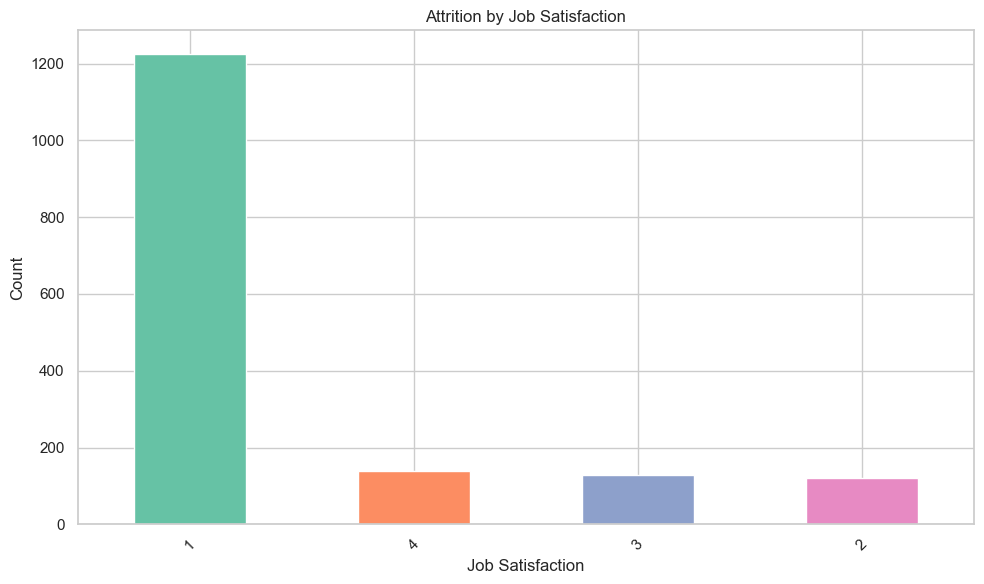

In [27]:
df_attrition = df[df['Attrition']=='Yes']
df_attrition['JobSatisfaction'].value_counts().plot(kind="bar", color=sns.color_palette("Set2"))
plt.title("Attrition by Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()



### 1st Factor Low Job Satisfaction Is the Strongest Predictor
#### Employees with Job Satisfaction = 1 have a 49% attrition rate.All other groups have <6%.
#### Retention strategy: Focus on improving job roles/tasks tied to low satisfaction.

Text(0.5, 1.0, 'Attrition by Job Satisfaction')

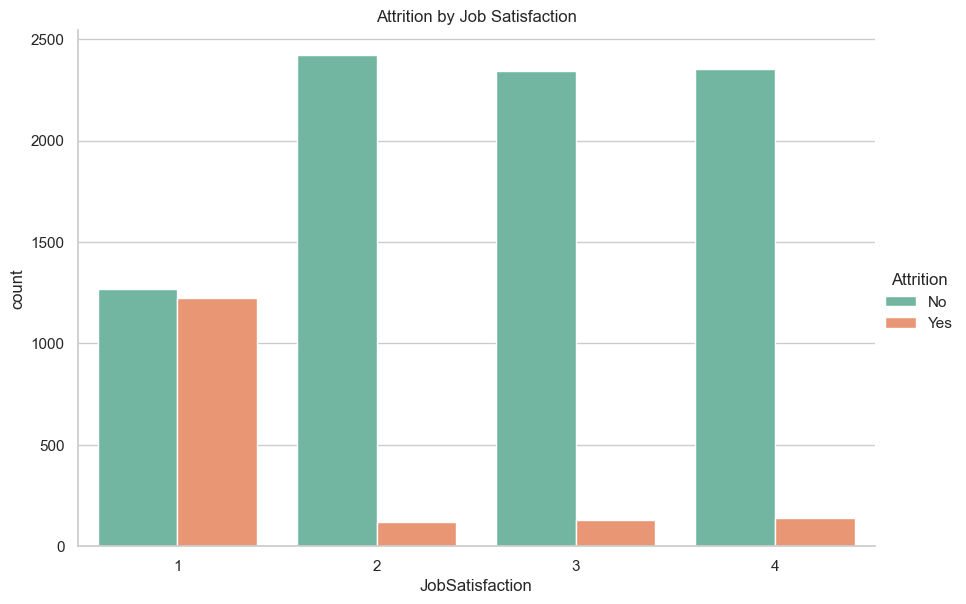

In [31]:

sns.catplot(x="JobSatisfaction", hue="Attrition", data=df, kind="count", height=6, aspect=1.5, palette="Set2")
plt.title("Attrition by Job Satisfaction")

### 2nd Factor "Overtime" is a Key Attrition Factor
##### Attrition rate is 22.2% for employees working Overtime

##### Only 13.6% for those without overtime
##### Recommendation: Offer workload balance or comp time to overtime workers.

Overtime causing attrition percentage: 22.25%
No overtime causing attrition percentage: 13.56%


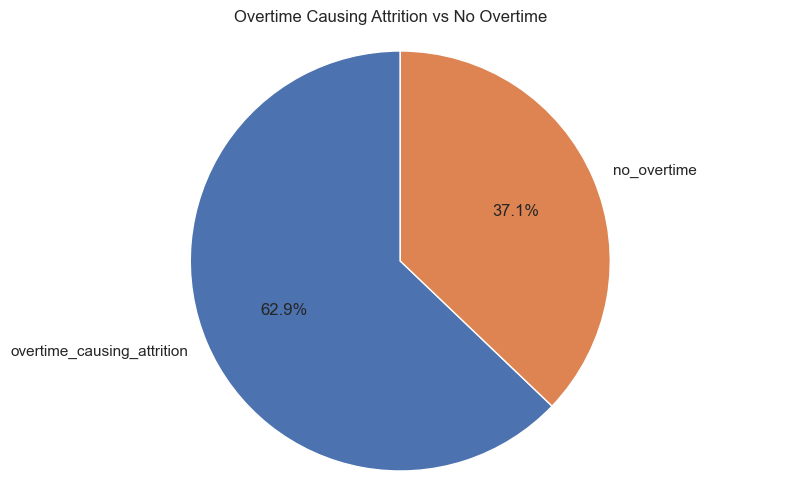

In [54]:
overtime_causing_attrition = df[(df['OverTime'] == 'Yes') & (df['Attrition'] == 'Yes')].shape[0]/(df[df['OverTime'] == 'Yes'].shape[0] )* 100
no_overtime = df[(df['OverTime'] == 'No') & (df['Attrition'] == 'Yes')].shape[0]/(df[df['OverTime'] == 'No'].shape[0] )* 100 
print(f"Overtime causing attrition percentage: {overtime_causing_attrition:.2f}%")
print(f"No overtime causing attrition percentage: {no_overtime:.2f}%")

values = [int(overtime_causing_attrition),int(no_overtime)]
labels = ['overtime_causing_attrition', 'no_overtime']

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Overtime Causing Attrition vs No Overtime    ')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()


<Axes: title={'center': 'Attrition due to OverTime'}, xlabel='OverTime'>

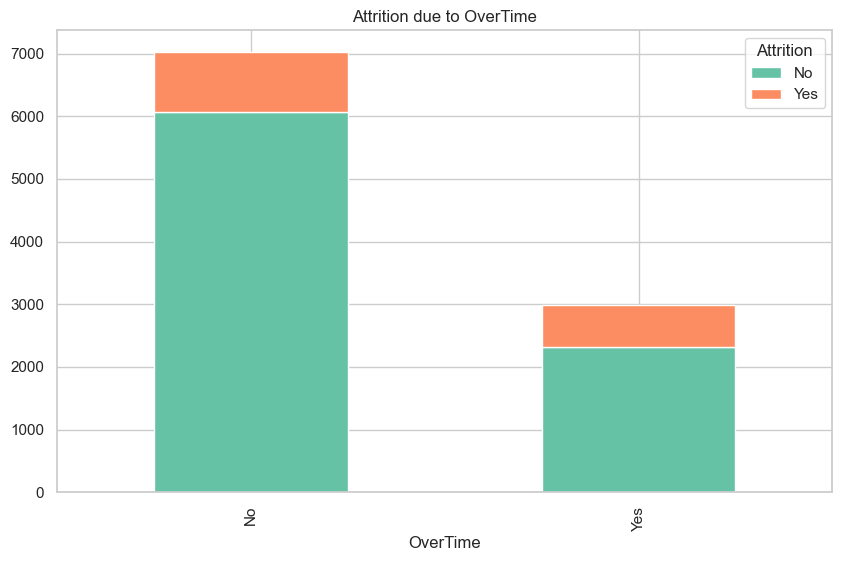

In [46]:
# sns.scatterplot(x="OverTime", y="WorkLifeBalance", hue="Attrition", data=df, palette="Set2")
# plt.title("Overtime vs Work-life Balance by Attrition")

pd.crosstab(df['OverTime'], df['Attrition']).plot(kind='bar', stacked=True, color=sns.color_palette("Set2"),title='Attrition due to OverTime')

In [33]:
df.columns

Index(['EmployeeID', 'Age', 'Gender', 'Department', 'JobRole',
       'EducationLevel', 'PerformanceRating', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'TrainingTimesLastYear', 'OverTime',
       'MonthlyIncome', 'DistanceFromHome', 'Attrition'],
      dtype='object')

### 3rd Factor. Poor Work-Life Balance Drives Attrition
Employees rating WorkLifeBalance = 1 have 24.1% attrition

Those with rating = 4 have just 12.2% attrition

Recomendation : Improve flexibility, time-off policies.

Text(0.5, 1.0, 'Attrition by Work-Life Balance')

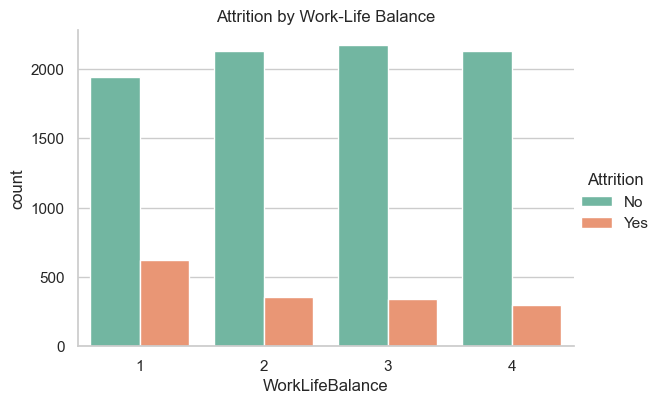

In [56]:
sns.catplot(x="WorkLifeBalance", hue="Attrition", data=df, kind="count", height=4, aspect=1.5, palette="Set2")
plt.title("Attrition by Work-Life Balance")

### 4th Factor : Managerial Roles Show Higher Attrition
Managers: 17.9% , Executives: 14.4%

#### Retention strategies for mid-to-senior management are needed.


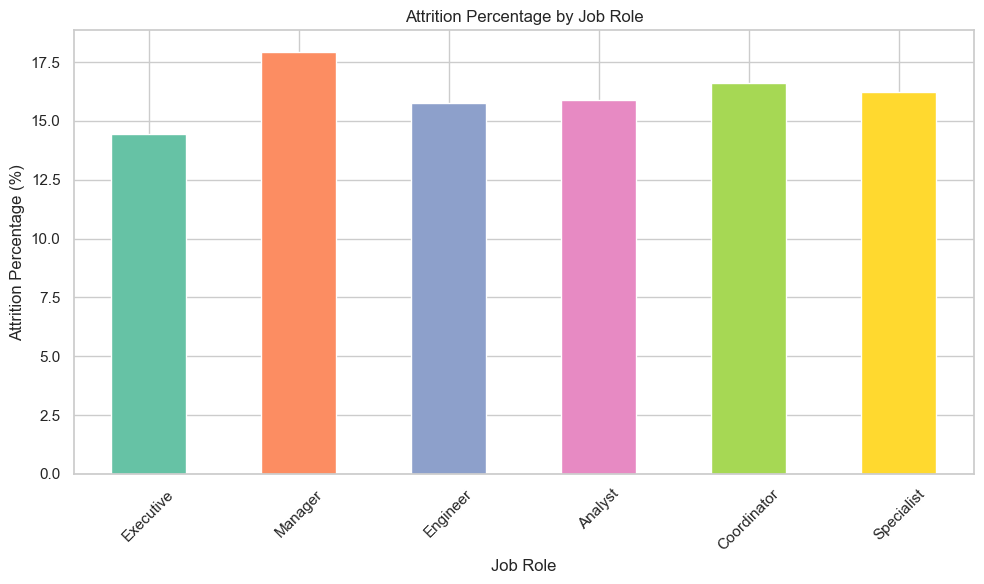

In [59]:
job_role_counts = df['JobRole'].value_counts()
attrition_percent = (df_attrition['JobRole'].value_counts() / job_role_counts * 100).reindex(df['JobRole'].unique())
attrition_percent.plot(kind="bar", color=sns.color_palette("Set2"))
plt.title("Attrition Percentage by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Attrition Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()

#### But it is more important to show major attrition withing each department and job role to create retention strategy.

C:\Users\Eabhi\AppData\Local\Temp\ipykernel_7772\1877966395.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, y="Dept_Role", x="AttritionRate_%", palette="Reds_r")


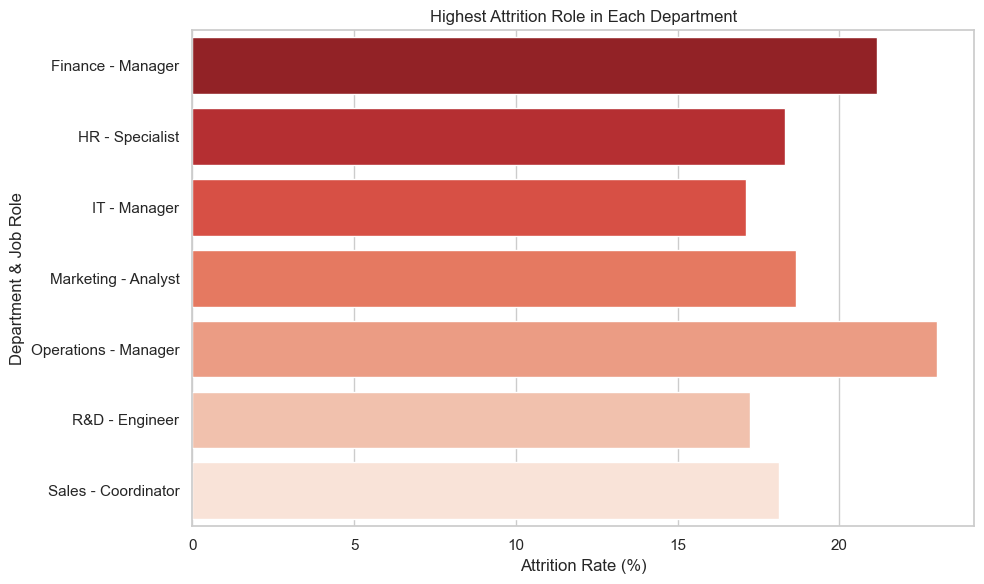

In [89]:

# Create attrition flag
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Step 1: Calculate attrition rate per (Department, JobRole)
role_attrition = df.groupby(['Department', 'JobRole'])['Attrition_Flag'].mean().reset_index()
role_attrition['AttritionRate_%'] = (role_attrition['Attrition_Flag'] * 100).round(2)

# Step 2: For each department, find the job role with the highest attrition
top_roles_by_dept = role_attrition.sort_values(['Department', 'AttritionRate_%'], ascending=[True, False])
top_attrition_roles = top_roles_by_dept.groupby('Department').first().reset_index()

# Drop internal column
top_attrition_roles = top_attrition_roles.drop(columns='Attrition_Flag')
df_plot = top_attrition_roles.copy()

# Step 3: Merge with original DataFrame to get full details
# Combine Department and JobRole for clearer axis labels
df_plot["Dept_Role"] = df_plot["Department"] + " - " + df_plot["JobRole"]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, y="Dept_Role", x="AttritionRate_%", palette="Reds_r")
plt.xlabel("Attrition Rate (%)")
plt.ylabel("Department & Job Role")
plt.title("Highest Attrition Role in Each Department")
plt.tight_layout()
plt.show()




### 5th Factor: Initial Years of Experience in the company are more vulnerable to attrition

#### 1st tree year attrition rate is ~27% while after initial three it averages around 16%
#### Retention Strategy: Focus on retaining employees with less than 3 years of experience


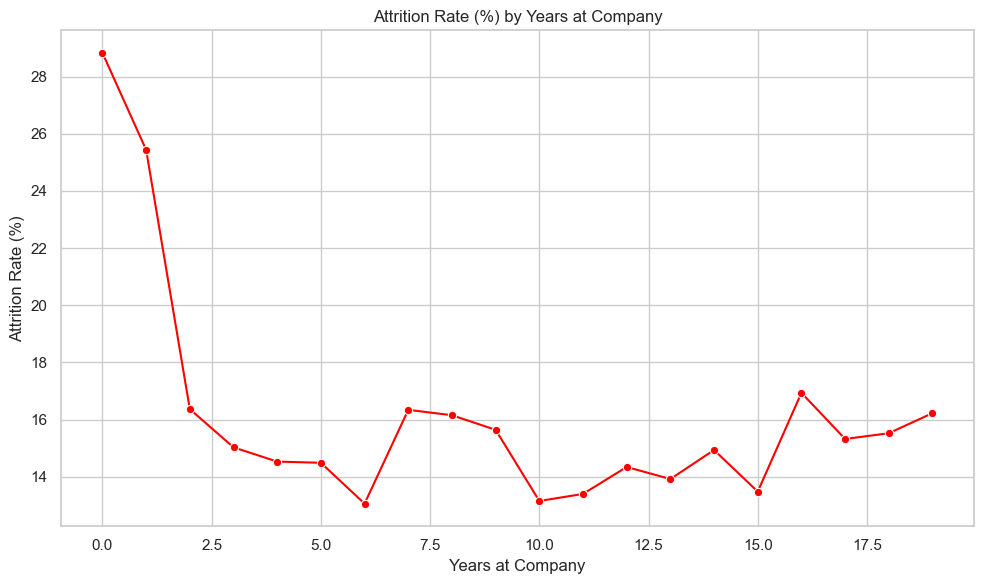

In [91]:
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

years_summary = df.groupby('YearsAtCompany')['Attrition_Flag'].mean().reset_index()
years_summary['AttritionRate'] = years_summary['Attrition_Flag'] * 100

plt.figure()
sns.lineplot(data=years_summary, x='YearsAtCompany', y='AttritionRate', marker='o', color='red')
plt.title("Attrition Rate (%) by Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Attrition Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df = pd.read_csv(file_path)
df_encoded = df.copy()
df_encoded['Attrition'] = encoder.fit_transform(df_encoded[['Attrition']])
df_encoded['JobRole'] = encoder.fit_transform(df_encoded[['JobRole']])
df_encoded['Department'] = encoder.fit_transform(df_encoded[['Department']])
df_encoded['OverTime'] = encoder.fit_transform(df_encoded[['OverTime']])
df_encoded['Gender'] = encoder.fit_transform(df_encoded[['Gender']])
def binMonthlyIncome(x):
    if x < 3000:
        return 0
    elif 3000 <= x < 5000:
        return 1  
    elif 5000 <= x < 7000:
        return 2  
    elif 7000 <= x < 10000:
        return 3  
    elif 10000 <= x < 15000:
        return 4
    elif 15000 <= x < 20000: 
        return 5
    else:
        return 6

df_encoded['MonthlyIncome'] = df_encoded['MonthlyIncome'].apply(binMonthlyIncome)     
df_encoded['MonthlyIncome'].value_counts()

def binAge(x):
    if x < 25:
        return 0
    elif 25 <= x < 30:
        return 1
    elif 30 <= x < 35:
        return 2      
    elif 35 <= x < 40:
        return 3
    elif 40 <= x < 45:
        return 4
    elif 45 <= x < 50:
        return 5
    elif 50 <= x < 55:
        return 6
    else:
        return 7
    
df_encoded['Age'] = df_encoded['Age'].apply(binAge)
df_encoded['Age'].value_counts()
df_encoded['good_salary'] = df_encoded['MonthlyIncome'] > df_encoded.groupby(['Department', 'JobRole'])['MonthlyIncome'].transform('max')
df_encoded['good_salary'] = df_encoded['good_salary'].astype(int)  
    



In [ ]:
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import SelectKBest
# X = df_encoded.drop(columns=['Attrition'])
# y = df_encoded['Attrition']
# chi2_scores = chi2(X, y)
# chi2_scores_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Chi2 Score': chi2_scores[0],
#     'p-value': chi2_scores[1]
# }).sort_values(by='Chi2 Score', ascending=False)
# chi2_scores_df['p-value'] = chi2_scores_df['p-value'].apply(lambda x: f"{x:.4f}")
# print(chi2_scores_df)


# # 14            MonthlyIncome  1999.188938  0.0000
# # 7           JobSatisfaction   774.102886  0.0000
# # 10           YearsAtCompany    86.281148  0.0000
# # 13                 OverTime    81.839204  0.0000
# # 9           WorkLifeBalance    62.301666  0.0000

                    Feature  Chi2 Score p-value
7           JobSatisfaction  774.102886  0.0000
10           YearsAtCompany   86.281148  0.0000
13                 OverTime   81.839204  0.0000
9           WorkLifeBalance   62.301666  0.0000
0                EmployeeID   38.892482  0.0000
16              good_salary    2.417518  0.1200
11       YearsInCurrentRole    2.359446  0.1245
6         PerformanceRating    1.570818  0.2101
3                Department    0.600394  0.4384
4                   JobRole    0.395934  0.5292
14            MonthlyIncome    0.254398  0.6140
15         DistanceFromHome    0.200453  0.6544
5            EducationLevel    0.070554  0.7905
1                       Age    0.034307  0.8531
12    TrainingTimesLastYear    0.023309  0.8787
2                    Gender    0.021955  0.8822
8   EnvironmentSatisfaction    0.020824  0.8853
